## RNN (순환신경망, Recurrnet Neural Network)

- CNN과 함께 딥러닝의 양대 산맥을 이루는 신경망
- 음성 인식, 문장 번역, 시계열 데이터를 통한 예측에서 활용함.
- 케라스에서는 RNN을 위한 4개의 계층을 제공함 (Embedding, SimpleRNN, LSTM, Conv1D)

### IMDB 데이터 셋

- 영화 리뷰에 대한 데이터 50,000개로 이루어져 있다.
- 25,000개의 훈련 데이터와 25,000개의 테스트 데이터
- 50%씩 긍정 리뷰와 부정 리뷰
- 이미 전처리가 되어 있어서 각 리뷰가 숫자로 변환되어 있다.

In [1]:
# 데이터셋 다운받기
from tensorflow.keras.datasets import imdb

# num_words: 가장 빈번하게 사용되는 단어의 개수
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

# 데이터 형태 확인하기
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [2]:
# 첫 번째 데이터 확인하기
print(x_train[0])
print('-----------------------------------')
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
-----------------------------------
1


#### x_train[0]

- 영어로 된 한 문장을 예시로 갖고왔다고 생각하면 된다.
- x_train[0]에서 볼 수 있는 숫자는 빈번하게 사용되는 정도
- 1은 데이터셋에서 가장 빈번하게 사용되는 단어, 10은 10번째로 빈번하게 사용되는 단어를 의미

#### y_train[0]
- 1은 긍정, 0은 부정적인 리뷰

In [3]:
# IMDB 데이터셋에서 가장 빈번하게 사용되는 30개의 단어
imdb_get_word_index = {}

# items() 는 인덱스와 아이템을 가진 튜플을 출력한다
for key, value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key
    
for i in range(1, 31):
    print('{}번째로 가장 많이 쓰인 단어 : {}'.format(i, imdb_get_word_index[i]))

1번째로 가장 많이 쓰인 단어 : the
2번째로 가장 많이 쓰인 단어 : and
3번째로 가장 많이 쓰인 단어 : a
4번째로 가장 많이 쓰인 단어 : of
5번째로 가장 많이 쓰인 단어 : to
6번째로 가장 많이 쓰인 단어 : is
7번째로 가장 많이 쓰인 단어 : br
8번째로 가장 많이 쓰인 단어 : in
9번째로 가장 많이 쓰인 단어 : it
10번째로 가장 많이 쓰인 단어 : i
11번째로 가장 많이 쓰인 단어 : this
12번째로 가장 많이 쓰인 단어 : that
13번째로 가장 많이 쓰인 단어 : was
14번째로 가장 많이 쓰인 단어 : as
15번째로 가장 많이 쓰인 단어 : for
16번째로 가장 많이 쓰인 단어 : with
17번째로 가장 많이 쓰인 단어 : movie
18번째로 가장 많이 쓰인 단어 : but
19번째로 가장 많이 쓰인 단어 : film
20번째로 가장 많이 쓰인 단어 : on
21번째로 가장 많이 쓰인 단어 : not
22번째로 가장 많이 쓰인 단어 : you
23번째로 가장 많이 쓰인 단어 : are
24번째로 가장 많이 쓰인 단어 : his
25번째로 가장 많이 쓰인 단어 : have
26번째로 가장 많이 쓰인 단어 : he
27번째로 가장 많이 쓰인 단어 : be
28번째로 가장 많이 쓰인 단어 : one
29번째로 가장 많이 쓰인 단어 : all
30번째로 가장 많이 쓰인 단어 : at


### 데이터를 동일한 길이로 맞추기
- Embedding층을 사용하기 위해서는 시퀀스 데이터(여기서는 문장을 나타냅니다)의 길이가 전부 동일해야 한다.
- 이를 위해 pad_sequences() 함수를 사용
    - 이 함수는 해당 데이터가 지정해준 길이보다 짧은 경우 0으로 채워 넣으며 긴 경우는 잘라낸다.
    - 단어의 뒤에 패딩을 추가하고 싶으면 padding인자를 post로 지정한다.

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

print('Before pad_sequences: ', len(x_train[0]))

Before pad_sequences:  218


In [5]:
pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = 'pre')
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = 'pre')

print('After pad_sequences: ', len(pad_x_train[0]))

After pad_sequences:  500


## Embedding 층을 사용하여 모델 구성하기

- Embedding층은 모델의 첫 번째 층으로만 사용할 수 있으며, 주로 순환 신경망과 연결하여 사용한다.
     - input_dim 인자는 학습 데이터 셋에서 사용한 단어의 개수(10,000)
     - output_dim 인자는 임베딩 벡터의 크기(32)
        - 이와 같이 인자를 설정하고나면 Embedding층은 (None, 500, 32)형태의 출력을 가지게 된다.
        - 500은 입력값의 길이를 지정했던 max_len의 길이와 같으며, 32는 임베딩 벡터의 크기와 같다.
     - input_length 인자는 Flatten 층을 사용하기 위해 전달

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))

### Embedding층 이후에 Dense층을 연결

- input_length 인자를 사용하여 출력 크기를 지정
- Dense층과의 연결을 위해 Flatten층을 사용
- 여기서는 직접 지정한 데이터의 최대 길이인 500(max_len)을 사용합니다. 또한, input_length 인자는 Embedding층과 연결된 층이 순환 신경망일 경우엔 사용하지 않습니다.

In [7]:
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


### 모델 학습시키기
- model.fit()에서 새로운 인자인 validation_split을 사용
- validation_split : 학습 데이터의 끝에서 해당 비율만큼 떼어내어 검증 데이터셋으로 활용.
- 여기서는 0.2로 학습 데이터의 20% 비율만큼을 검증 데이터로 활용
- 데이터에서 무작위로 20%의 비율만큼 뽑아오는 게 아니라, 단손하게 학습 데이터의 끝에서 20%를 떼어낸다.

In [8]:
history = model.fit(pad_x_train, y_train, batch_size = 32, epochs = 30, validation_split = 0.2)

Epoch 1/30
625/625 [==============================] - 11s 17ms/step - loss: 0.4662 - acc: 0.7683 - val_loss: 0.2979 - val_acc: 0.8774
Epoch 2/30
625/625 [==============================] - 10s 16ms/step - loss: 0.2012 - acc: 0.9258 - val_loss: 0.2723 - val_acc: 0.8892
Epoch 3/30
625/625 [==============================] - 11s 17ms/step - loss: 0.1066 - acc: 0.9699 - val_loss: 0.2863 - val_acc: 0.8860
Epoch 4/30
625/625 [==============================] - 11s 18ms/step - loss: 0.0502 - acc: 0.9916 - val_loss: 0.3042 - val_acc: 0.8862
Epoch 5/30
625/625 [==============================] - 13s 21ms/step - loss: 0.0233 - acc: 0.9978 - val_loss: 0.3268 - val_acc: 0.8868
Epoch 6/30
625/625 [==============================] - 11s 18ms/step - loss: 0.0115 - acc: 0.9997 - val_loss: 0.3548 - val_acc: 0.8840
Epoch 7/30
625/625 [==============================] - 11s 18ms/step - loss: 0.0064 - acc: 0.9999 - val_loss: 0.3755 - val_acc: 0.8836
Epoch 8/30
625/625 [==============================] - 11s 17ms

In [9]:
# 학습 결과로 리턴된 history에서 확인할 수 있는 지표 출력
# -> 학습 과정을 확인할 때 그래프로 표시할 수 있는 항목이 출력된다.
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


## 모델 평가하기
- 스탠포드 대학교에서 저술한 논문에서 IMDB 데이터셋을 예제와 동일한 비율(학습데이터 50 : 테스트데이터 50)을 사용하여 88.98%의 정확도를 얻었다고 설명하고 있다.

In [10]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.8073 - acc: 0.8716


[0.8073052167892456, 0.8715599775314331]

## 학습과정 확인하기

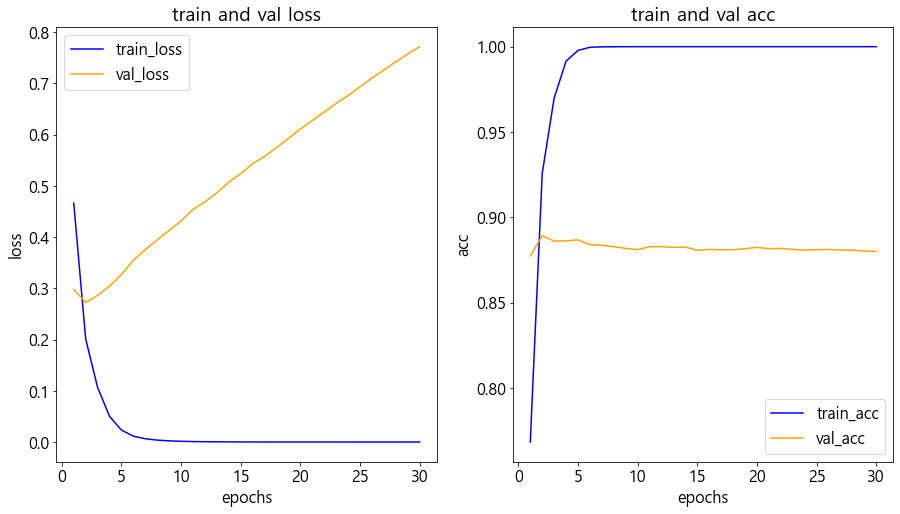

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (15, 8)

epochs = range(1, len(history.history['loss']) +1)

# 서브플롯을 위한 그래프 그리기 시작
fig = plt.figure()

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, history.history['loss'], color = 'blue', label = 'train_loss')
ax1.plot(epochs, history.history['val_loss'], color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, history.history['acc'], color = 'blue', label = 'train_acc')
ax2.plot(epochs, history.history['val_acc'], color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()